In [2]:
# make all neccessary imports

import cbpro as cb
from cbpro.public_client import PublicClient
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# initialize the public client
pub = PublicClient()

# get data
dat = pd.DataFrame(pub.get_product_historic_rates(product_id='BTC-EUR'),
                   columns=['time','low','high','open','close','volume'])

# perform EDA on the retrieved data
dat.head()

,time,low,high,open,close,volume
0,1665053400,20367.41,20367.55,20367.55,20367.41,0.010104
1,1665053280,20362.77,20377.01,20377.01,20371.74,0.012434
2,1665053220,20369.45,20384.16,20380.52,20369.45,0.166325
3,1665053100,20383.80,20384.78,20383.83,20384.78,0.992370
4,1665052980,20390.45,20394.00,20394.00,20390.45,0.043967


In [4]:
# data wrangling
# extract the needed variable (columns) and convert to numpy arrays for easy manipulation
price = dat['close'].array 
pricechange = price[1:]-price[:-1]
pricechange = np.hstack((np.array([np.nan]),pricechange))
dat['pricechange'] = pricechange

      price        size  high
0  20375.03        0.07     1
1  20374.38       0.059     1
2  20373.47  0.05193742     2
3  20373.46  0.07450546     1
4   20371.7   0.0496747     1
       price        size  high
95     20689    0.000142     1
96  20689.04  0.00125222     1
97     20690    0.018233     1
98  20698.85  0.00009318     1
99  20699.14  0.00186124     1
20308.6053
20501.9018


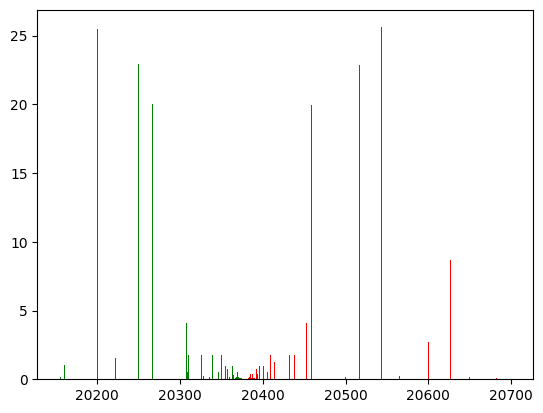

In [5]:
# pd.DataFrame(pub.get_product_order_book(product_id='BTC-EUR', level=2),
#             columns=['time','low','high'])

bids = pub.get_product_order_book(product_id='BTC-EUR', level=2)['bids']
asks = pub.get_product_order_book(product_id='BTC-EUR', level=2)['asks']

bids = pd.DataFrame(bids, columns=['price','size','high'])[:100]
asks = pd.DataFrame(asks, columns=['price','size','high'])[:100]
print(bids.head())
print(asks.tail())

bid_vol = bids.price.astype(float) * bids.size.astype('float')
ask_vol = asks.price.astype(float) * asks.size.astype('float')

print(bids['price'][:100].astype('float').mean())
print(asks['price'][:100].astype('float').mean())

x = np.linspace(0,100,num=100)
plt.bar(bids['price'][:100].astype('float'), bids['size'][:100].astype('float'), color='green') # buyers
plt.bar(asks['price'][:100].astype('float'), asks['size'][:100].astype('float'), color='red') # sellers
plt.show()

In [6]:
pub.get_product_ticker(product_id='BTC-EUR')

{'ask': '20379.7',
 'bid': '20374.6',
 'volume': '410.87463065',
 'trade_id': 67914366,
 'price': '20374.24',
 'size': '0.00042959',
 'time': '2022-10-06T10:50:38.508216Z'}

In [7]:
data = pub.get_product_trades(product_id='BTC-EUR', before='2022-09-13 12:00:00',
                        after='2022-09-13 12:02:00', limit=None, result=None)

trades = []
while True:
    if len(trades) >= 500:
        break
    trades.append(next(data))
data = pd.DataFrame(trades)[:450]
data['price'] = data['price'].astype('float')
data['size'] = data['size'].astype('float')
buy = data[(data.side == 'buy')]
#print(buy)

sell = data[(data.side == 'sell')]
#print(sell)
print(data)
print(buy.shape)
print(sell.shape)

                            time  trade_id     price      size  side
0    2022-10-06T10:50:38.508216Z  67914366  20374.24  0.000430   buy
1    2022-10-06T10:50:37.690036Z  67914365  20379.70  0.000098  sell
2    2022-10-06T10:50:23.278605Z  67914364  20367.41  0.010000   buy
3    2022-10-06T10:50:08.897888Z  67914363  20367.55  0.000104   buy
4    2022-10-06T10:49:47.425757Z  67914362  20371.74  0.001030  sell
..                           ...       ...       ...       ...   ...
445  2022-10-06T09:18:53.758659Z  67913921  20367.14  0.000006  sell
446  2022-10-06T09:18:53.754194Z  67913920  20367.14  0.074420  sell
447  2022-10-06T09:18:53.724712Z  67913919  20366.72  0.036869  sell
448  2022-10-06T09:18:53.709408Z  67913918  20366.72  0.033131  sell
449  2022-10-06T09:18:53.705636Z  67913917  20366.71  0.030072  sell

[450 rows x 5 columns]
(181, 5)
(269, 5)


                                      size
time                        side          
2022-10-06T10:50:38.508216Z buy   0.000430
2022-10-06T10:50:37.690036Z sell  0.000098
2022-10-06T10:50:23.278605Z buy   0.010000
2022-10-06T10:50:08.897888Z buy   0.000104
2022-10-06T10:49:47.425757Z sell  0.001030
...                                    ...
2022-10-06T09:18:53.758659Z sell  0.000006
2022-10-06T09:18:53.754194Z sell  0.074420
2022-10-06T09:18:53.724712Z sell  0.036869
2022-10-06T09:18:53.709408Z sell  0.033131
2022-10-06T09:18:53.705636Z sell  0.030072

[363 rows x 1 columns]
                                     price
time                        side          
2022-10-06T10:50:38.508216Z buy   20374.24
2022-10-06T10:50:37.690036Z sell  20379.70
2022-10-06T10:50:23.278605Z buy   20367.41
2022-10-06T10:50:08.897888Z buy   20367.55
2022-10-06T10:49:47.425757Z sell  20371.74
...                                    ...
2022-10-06T09:18:53.758659Z sell  20367.14
2022-10-06T09:18:53.754194Z se

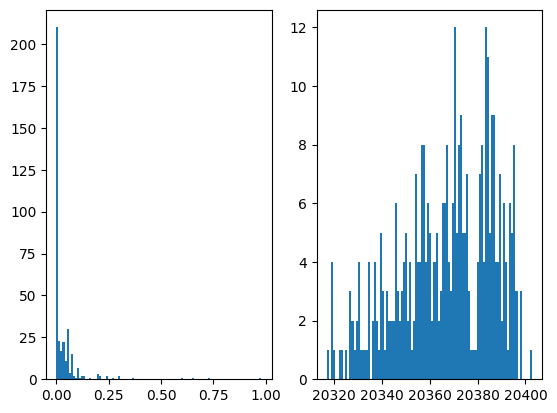

In [15]:
size= data[['size', 'side']]
size.index = data.time
size=size.groupby(['time', 'side']).sum()[::-1]
print(size)

price = data[['price', 'side']]
price.index = data.time
price =price.groupby(['time', 'side']).first()[::-1]
print(price)

fig, axs = plt.subplots(1,2)
axs[0].hist(size, bins=100)
axs[1].hist(price, bins=100)
plt.show()


(array([44., 57., 34., 29., 82., 29., 41., 67., 29., 38.]),
 array([19271.38812159, 19271.39449289, 19271.40086419, 19271.40723549,
        19271.41360679, 19271.41997809, 19271.42634939, 19271.43272069,
        19271.43909199, 19271.44546329, 19271.45183459]),
 <BarContainer object of 10 artists>)

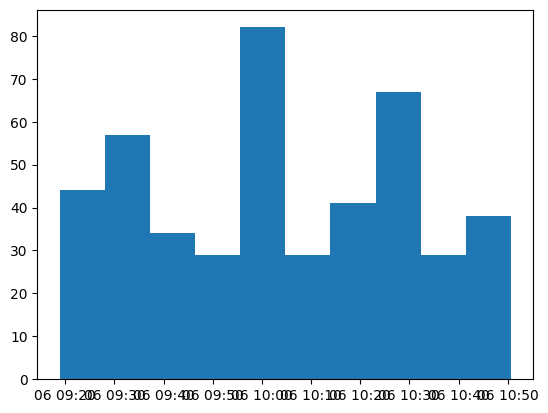

In [34]:
# find b as discussed
import datetime as dt
n = len(price)
times = pd.to_datetime(data['time'])
# dt.datetime(time_diff)
diff = times.iloc[0] - times.iloc[-1]
diff = diff.total_seconds()

b = (n-1)/diff
1/b

plt.hist(times)